In [1]:
import numpy as np
import pandas as pd
from scipy.stats import uniform
import math
from datetime import datetime
import time 
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
#Input parameters
bins = [100, 200, 400, 600, 800, 1000]
runs = 10
seed = 1886


In [3]:
def RandomDropping(n, runs):
    results = np.zeros(runs, ) #to have empty bin as the number of 
    for r in range(runs):
        bins = np.zeros(n,)
        for b in range(n):
            index = np.random.randint(low = 0, high = n, size = 1)
            bins[index] = bins[index] + 1
            results[r] = max(bins)

    avg = np.average(results)
    std = np.std(results, ddof=1)
    if std!=0:
        confInt = t.interval(0.95, runs-1, avg, std/math.sqrt(runs))

    else:
        confInt = (avg,avg)

    return avg, confInt

In [4]:
def RandomLoadBalancing(n, d, runs):
    results = np.zeros(runs, )
    for r in range(runs):
        bins = np.zeros(n,)
        for b in range(n):
            indexes = np.random.randint(low = 0, high = n, size = d)
            minB = bins[indexes[0]]
            minIdx = indexes[0]
            for i in range(d):
                if minB > bins[indexes[i]]:
                    minIdx = indexes[i]
                    minB = bins[indexes[i]]
            bins[minIdx] = bins[minIdx] + 1
        results[r] = max(bins)
        
    avg = np.average(results)
    std = np.std(results, ddof=1)
    if std!=0:
        confInt = t.interval(0.95, runs-1, avg, std/math.sqrt(runs))
    else:
        confInt = (avg,avg)
    return avg, confInt

In [5]:
#Simulations for Random Dropping
avgs = []
confInts = []
np.random.seed(seed) 
for b in bins:
    avg, confInt= RandomDropping(b, runs)
    avgs.append(avg)
    confInts.append(confInt)
#Output parameters
avgs = np.array(avgs)
confInts = np.array(confInts)

In [6]:
#Simulations for Random Load Balancing with d = 2
avgs2 = []
confInts2 = []
np.random.seed(seed)
for b in bins:
    avg, confInt = RandomLoadBalancing(b, 2, runs)
    avgs2.append(avg)
    confInts2.append(confInt)
#Output parameters
avgs2 = np.array(avgs2)
confInts2 = np.array(confInts2)

In [7]:
#Simulations for Random Load Balancing with d = 4
avgs4 = []
confInts4 = []
np.random.seed(seed)
for b in bins:
    avg, confInt = RandomLoadBalancing(b, 4, runs)
    avgs4.append(avg)
    confInts4.append(confInt)
#Output parameters
avgs4 = np.array(avgs4)
confInts4 = np.array(confInts4)


Text(0, 0.5, 'Max bin occupancy')

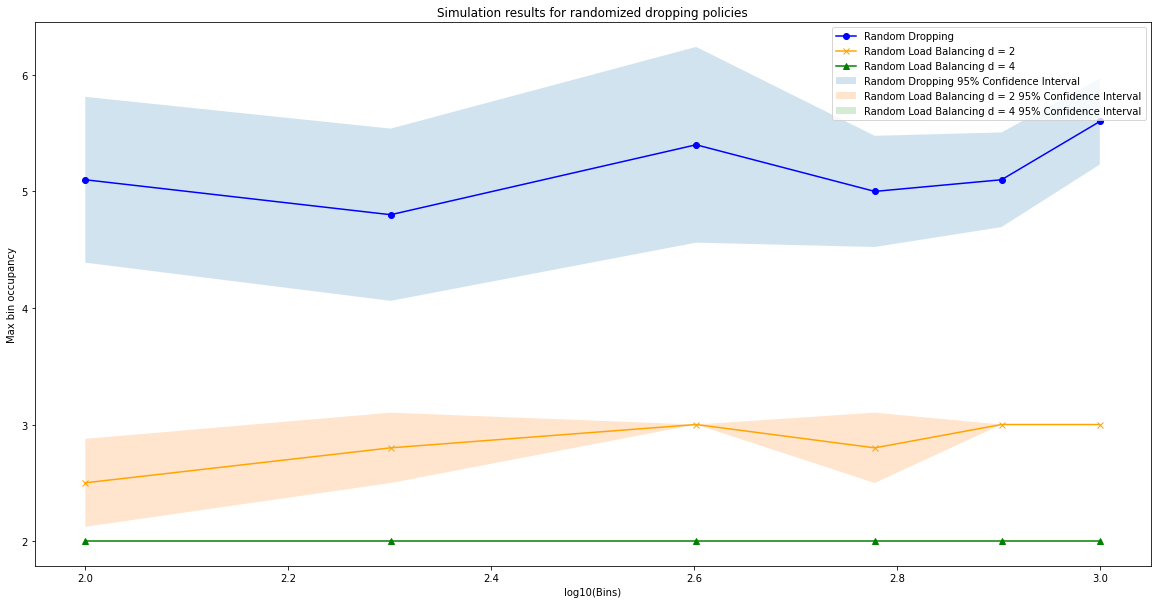

In [8]:
#Plot Fig.1
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.log10(bins), avgs, color = 'b', marker = 'o', label = 'Random Dropping')
ax.plot(np.log10(bins), avgs2, color = 'orange', marker = 'x', label = 'Random Load Balancing d = 2')
ax.plot(np.log10(bins), avgs4, color = 'g', marker = '^', label = 'Random Load Balancing d = 4')

ax.fill_between(np.log10(bins), confInts[:,0], confInts[:,1],alpha = 0.2, label = 'Random Dropping 95% Confidence Interval')
ax.fill_between(np.log10(bins), confInts2[:,0], confInts2[:,1],alpha = 0.2, label = 'Random Load Balancing d = 2 95% Confidence Interval')
ax.fill_between(np.log10(bins), confInts4[:,0], confInts4[:,1],alpha = 0.2, label = 'Random Load Balancing d = 4 95% Confidence Interval')
ax.legend()
plt.xlabel('log10(Bins)')
plt.title('Simulation results for randomized dropping policies')
plt.ylabel('Max bin occupancy')

In [9]:
def tRandomDropping(x):
    return 3*(np.log(x))/(np.log(np.log(x)))

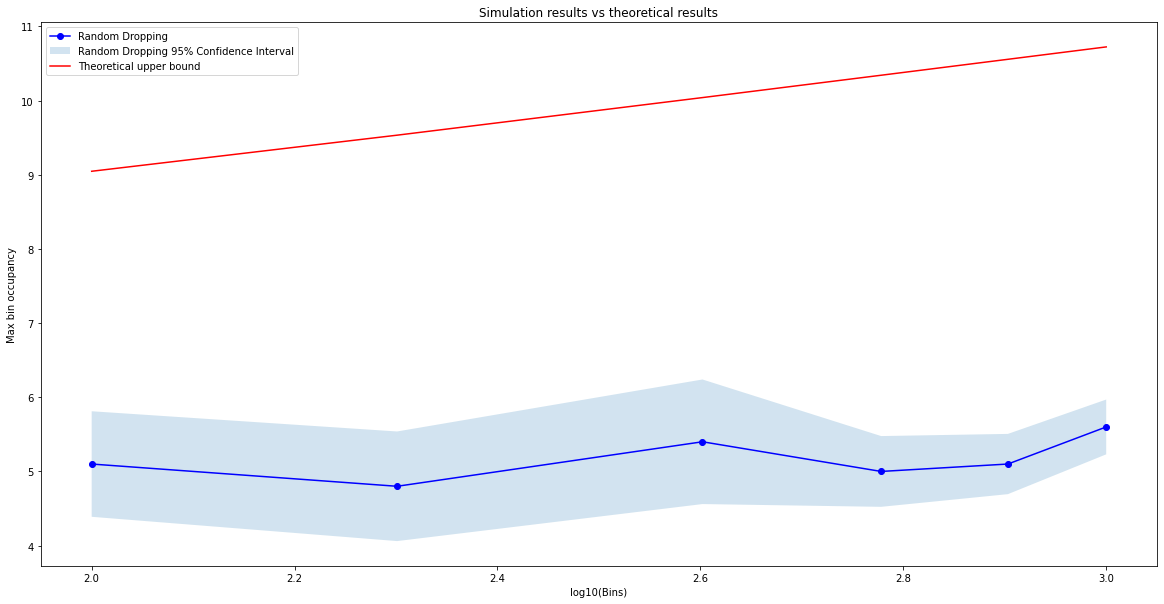

In [10]:
#Plot Fig.2
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.log10(bins), avgs, color = 'b', marker = 'o', label = 'Random Dropping')
ax.fill_between(np.log10(bins), confInts[:,0], confInts[:,1],alpha = 0.2, label = 'Random Dropping 95% Confidence Interval')
ax.plot(np.log10(bins), tRandomDropping(bins), color = 'r', label = 'Theoretical upper bound')
plt.xlabel('log10(Bins)')
plt.title('Simulation results vs theoretical results')
plt.ylabel('Max bin occupancy')
plt.legend()


In [11]:
#Random dropping witha Triangular distribution
def RandomDroppingWithT(n, runs):
    results = np.zeros(runs, )
    for r in range(runs):
        bins = np.zeros(n,)
        for b in range(n):
            index = int(np.random.triangular(0, int(n/2), n-1, size = 1))
            bins[index] = bins[index] + 1
        results[r] = max(bins)
        
    avg = np.average(results)
    std = np.std(results, ddof=1)
    if std!=0:
        confInt = t.interval(0.95, runs-1, avg, std/math.sqrt(runs))

    else:
        confInt = (avg,avg)

    return avg, confInt


In [12]:
#Simulations for Random dropping with Triangular distribution
avgsTr = []
confIntsTr = []
np.random.seed(seed)
for b in bins:
    avg, confInt = RandomDroppingWithT(b, runs)
    avgsTr.append(avg)
    confIntsTr.append(confInt)
#Output parameters
avgsTr = np.array(avgsTr)
confIntsTr = np.array(confIntsTr)

Text(0, 0.5, 'Max bin occupancy')

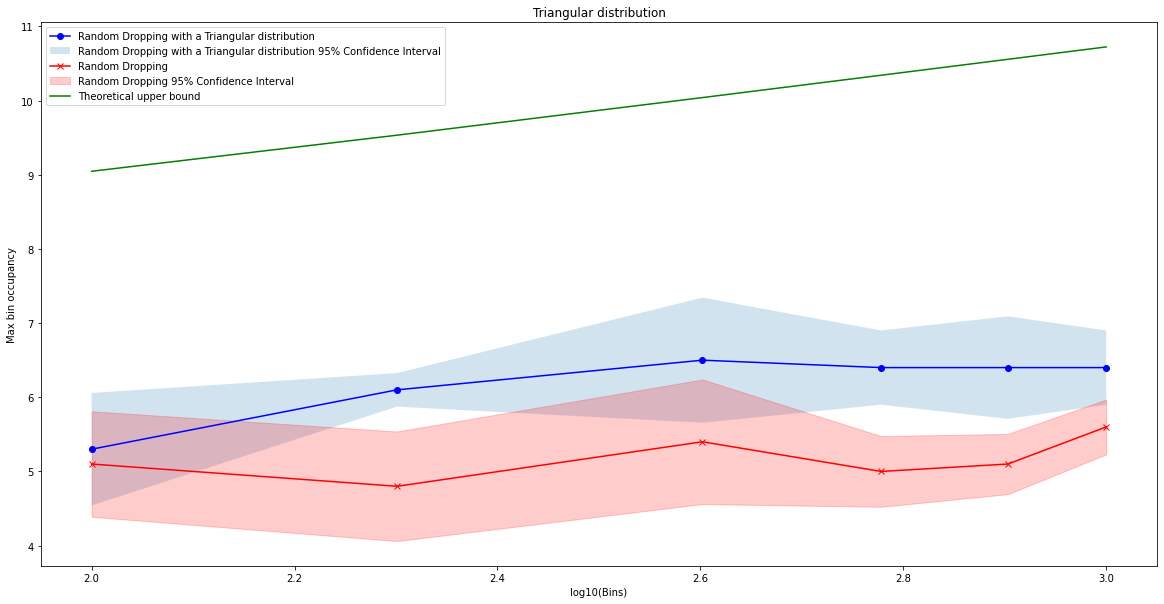

In [13]:
#Plot Fig.3
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.log10(bins), avgsTr, color = 'b', marker = 'o', label = 'Random Dropping with a Triangular distribution')
ax.fill_between(np.log10(bins), confIntsTr[:,0], confIntsTr[:,1],alpha = 0.2, label = 'Random Dropping with a Triangular distribution 95% Confidence Interval')
ax.plot(np.log10(bins), avgs, color = 'r', marker = 'x', label = 'Random Dropping')
ax.fill_between(np.log10(bins), confInts[:,0], confInts[:,1],alpha = 0.2, label = 'Random Dropping 95% Confidence Interval', color = 'r')
ax.plot(np.log10(bins), tRandomDropping(bins), color = 'g', label = 'Theoretical upper bound')
ax.legend()
plt.xlabel('log10(Bins)')
plt.title('Triangular distribution')
plt.ylabel('Max bin occupancy')
